In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
amazon = pd.read_table('amazon_cells_labelled.txt', header=None)
amazon.columns = ['text', 'score']
amazon.head()

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
#keyword feature
keywords = ['good', 'great', 'excellent', 'best', 'recommend', 'happy']

for key in keywords:
    amazon[str(key)] = amazon.text.str.contains(' '+str(key)+' ', case=False)

In [4]:
#set score column into a boolean
amazon['score'] = (amazon['score'] == 1)

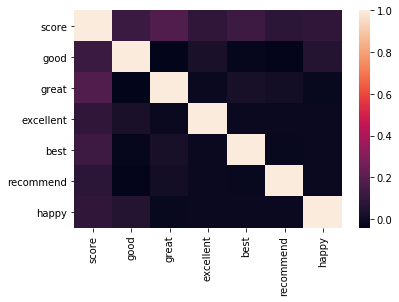

In [5]:
sns.heatmap(amazon.corr())

In [6]:
data = amazon[keywords]
target = amazon['score']

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points: {}'.format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points: 403
